In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Irish data

In [15]:
#reading in the Irish dataset
dfIe = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/EHQ10/CSV/1.0/en')
dfIe

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02741V03309,Sub Sector,UNIT,VALUE
0,EHQ10C01,Employment,20081,2008Q1,01,Civil service,Number,41700.00
1,EHQ10C01,Employment,20081,2008Q1,02,Defence,Number,11200.00
2,EHQ10C01,Employment,20081,2008Q1,03,Garda Siochana,Number,14900.00
3,EHQ10C01,Employment,20081,2008Q1,04,Education,Number,116100.00
4,EHQ10C01,Employment,20081,2008Q1,05,Regional bodies,Number,38900.00
...,...,...,...,...,...,...,...,...
5363,EHQ10C08,Average hourly total labour costs,20231,2023Q1,07,Semi-State companies,Euro,37.35
5364,EHQ10C08,Average hourly total labour costs,20231,2023Q1,09,Commercial Semi-State companies,Euro,37.74
5365,EHQ10C08,Average hourly total labour costs,20231,2023Q1,10,Non commercial Semi-State companies,Euro,36.47
5366,EHQ10C08,Average hourly total labour costs,20231,2023Q1,-,Total Public Sector including Semi State bodies,Euro,37.64


In [16]:
# removing white spaces from column names
dfIe.rename(columns={"Sub Sector": "Sub_Sector"}, inplace=True)
dfIe.rename(columns={"Statistic Label": "Statistic_Label"}, inplace=True)

In [17]:
dfIe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        5368 non-null   object 
 1   Statistic_Label  5368 non-null   object 
 2   TLIST(Q1)        5368 non-null   int64  
 3   Quarter          5368 non-null   object 
 4   C02741V03309     5368 non-null   object 
 5   Sub_Sector       5368 non-null   object 
 6   UNIT             5368 non-null   object 
 7   VALUE            5368 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 335.6+ KB


In [18]:
dfIe['Statistic_Label'].unique()

array(['Employment', 'Average Weekly Earnings', 'Average Hourly Earnings',
       'Average Hourly Earnings excluding Irregular Earnings',
       'Average Weekly Paid Hours', 'Average hourly irregular earnings',
       'Average hourly other labour costs',
       'Average hourly total labour costs'], dtype=object)

In [19]:
dfIe['TLIST(Q1)'].unique()

array([20081, 20082, 20083, 20084, 20091, 20092, 20093, 20094, 20101,
       20102, 20103, 20104, 20111, 20112, 20113, 20114, 20121, 20122,
       20123, 20124, 20131, 20132, 20133, 20134, 20141, 20142, 20143,
       20144, 20151, 20152, 20153, 20154, 20161, 20162, 20163, 20164,
       20171, 20172, 20173, 20174, 20181, 20182, 20183, 20184, 20191,
       20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211, 20212,
       20213, 20214, 20221, 20222, 20223, 20224, 20231], dtype=int64)

In [20]:
dfIe['C02741V03309'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '09', '10', '-', '08'],
      dtype=object)

In [21]:
dfIe['Sub_Sector'].unique()

array(['Civil service', 'Defence', 'Garda Siochana', 'Education',
       'Regional bodies', 'Health', 'Semi-State companies',
       'Commercial Semi-State companies',
       'Non commercial Semi-State companies',
       'Total Public Sector including Semi State bodies',
       'Total Public Sector excluding Semi State bodies'], dtype=object)

In [22]:
dfIe['UNIT'].unique()

array(['Number', 'Euro', 'Hours'], dtype=object)

In [23]:
dfIe['VALUE'].unique()

array([4.170e+04, 1.120e+04, 1.490e+04, ..., 3.774e+01, 3.764e+01,
       3.768e+01])

In [24]:
dfIe.describe()

,TLIST(Q1),VALUE
count,5368.000000,5368.000000
mean,20153.786885,13814.342345
std,44.011593,58776.196299
min,20081.000000,0.090000
25%,20114.000000,18.382500
50%,20153.000000,29.825000
75%,20192.000000,238.287500
max,20231.000000,450000.000000


In [25]:
dfIe.describe(include='object')

,STATISTIC,Statistic_Label,Quarter,C02741V03309,Sub_Sector,UNIT
count,5368,5368,5368,5368,5368,5368
unique,8,8,61,11,11,3
top,EHQ10C01,Employment,2008Q1,01,Civil service,Euro
freq,671,671,88,488,488,4026


In [26]:
#converting quarters to datetime data type
dfIe['Quarter'] = pd.to_datetime(dfIe['Quarter'])
dfIe['Quarter']

0      2008-01-01
1      2008-01-01
2      2008-01-01
3      2008-01-01
4      2008-01-01
          ...    
5363   2023-01-01
5364   2023-01-01
5365   2023-01-01
5366   2023-01-01
5367   2023-01-01
Name: Quarter, Length: 5368, dtype: datetime64[ns]

In [27]:
#setting quarter column as index. Inplace to save memory
dfIe.set_index('Quarter', inplace=True)

In [28]:
dfIe

,STATISTIC,Statistic_Label,TLIST(Q1),C02741V03309,Sub_Sector,UNIT,VALUE
Quarter,,,,,,,
2008-01-01,EHQ10C01,Employment,20081,01,Civil service,Number,41700.00
2008-01-01,EHQ10C01,Employment,20081,02,Defence,Number,11200.00
2008-01-01,EHQ10C01,Employment,20081,03,Garda Siochana,Number,14900.00
2008-01-01,EHQ10C01,Employment,20081,04,Education,Number,116100.00
2008-01-01,EHQ10C01,Employment,20081,05,Regional bodies,Number,38900.00
...,...,...,...,...,...,...,...
2023-01-01,EHQ10C08,Average hourly total labour costs,20231,07,Semi-State companies,Euro,37.35
2023-01-01,EHQ10C08,Average hourly total labour costs,20231,09,Commercial Semi-State companies,Euro,37.74
2023-01-01,EHQ10C08,Average hourly total labour costs,20231,10,Non commercial Semi-State companies,Euro,36.47


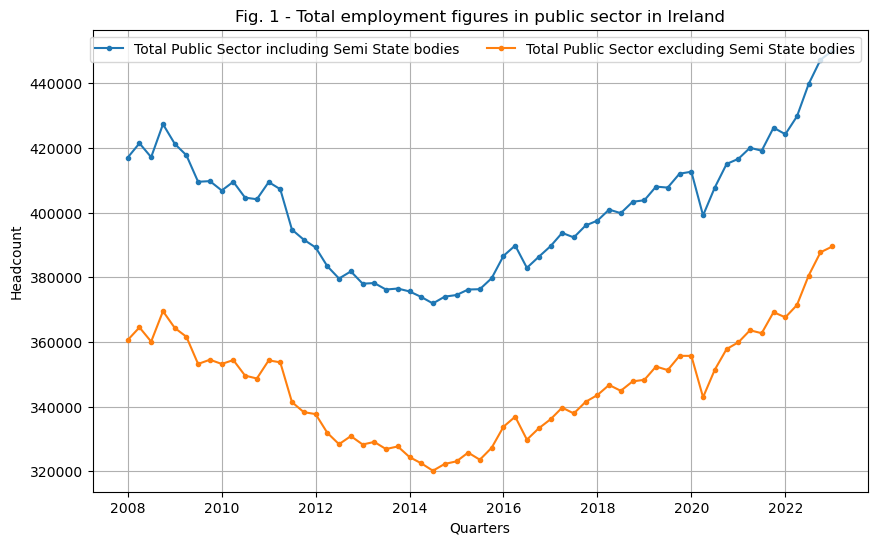

In [29]:
#selecting rows from df where Statistic_Label is value Employment
dfIe_employment = dfIe[dfIe['Statistic_Label'] == 'Employment']

# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining group with total figures
totalsEmployIE_group = ['Total Public Sector including Semi State bodies', 'Total Public Sector excluding Semi State bodies']

# looping through the group created 
for subsector in totalsEmployIE_group:
    df_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.title('Fig. 1 - Total employment figures in public sector in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='best', ncol=2) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

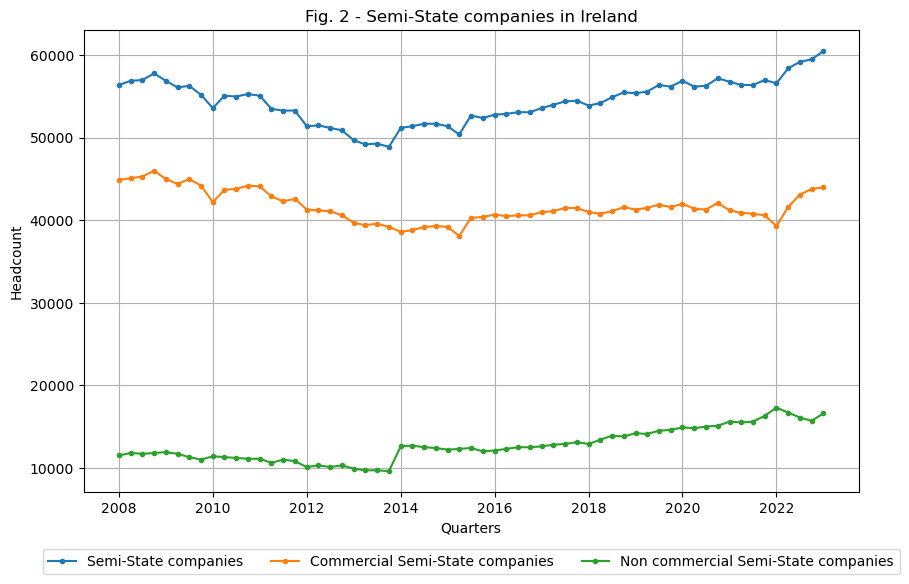

In [30]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining semi-state companies group
semiState_group = ['Semi-State companies', 'Commercial Semi-State companies', 'Non commercial Semi-State companies']

# looping through semiState_group 
for subsector in semiState_group:
    df_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.title('Fig. 2 - Semi-State companies in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

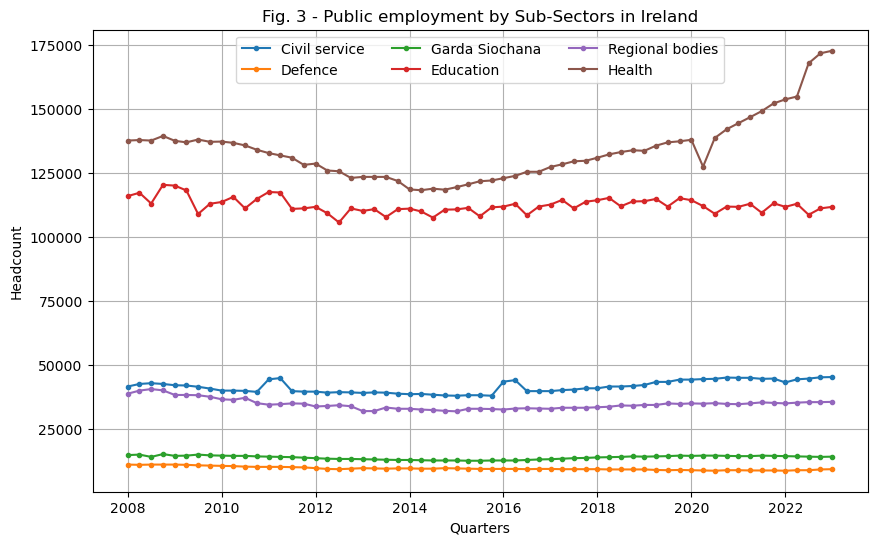

In [31]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining subsectors
subsectors = ['Civil service', 'Defence', 'Garda Siochana', 'Education', 'Regional bodies', 'Health']

#Looping through the Sub_Sectors in the group 
for subsector in subsectors:
    dfIe_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(dfIe_subsector.index, dfIe_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.title('Fig. 3 - Public employment by Sub-Sectors in Ireland')
plt.grid(True)

# Put the legend in the background
ax.legend(loc='upper center', ncol=3)

plt.show()

#### Irish earnings

In [32]:
#creating df with average weekly earnings
earningsIe = dfIe[dfIe['Statistic_Label'] == 'Average Weekly Earnings']
earningsIe

,STATISTIC,Statistic_Label,TLIST(Q1),C02741V03309,Sub_Sector,UNIT,VALUE
Quarter,,,,,,,
2008-01-01,EHQ10C02,Average Weekly Earnings,20081,01,Civil service,Euro,918.03
2008-01-01,EHQ10C02,Average Weekly Earnings,20081,02,Defence,Euro,843.53
2008-01-01,EHQ10C02,Average Weekly Earnings,20081,03,Garda Siochana,Euro,1182.62
2008-01-01,EHQ10C02,Average Weekly Earnings,20081,04,Education,Euro,892.52
2008-01-01,EHQ10C02,Average Weekly Earnings,20081,05,Regional bodies,Euro,963.45
...,...,...,...,...,...,...,...
2023-01-01,EHQ10C02,Average Weekly Earnings,20231,07,Semi-State companies,Euro,1155.26
2023-01-01,EHQ10C02,Average Weekly Earnings,20231,09,Commercial Semi-State companies,Euro,1169.49
2023-01-01,EHQ10C02,Average Weekly Earnings,20231,10,Non commercial Semi-State companies,Euro,1125.43


In [33]:
earningsIe['Sub_Sector'].unique()

array(['Civil service', 'Defence', 'Garda Siochana', 'Education',
       'Regional bodies', 'Health', 'Semi-State companies',
       'Commercial Semi-State companies',
       'Non commercial Semi-State companies',
       'Total Public Sector including Semi State bodies',
       'Total Public Sector excluding Semi State bodies'], dtype=object)

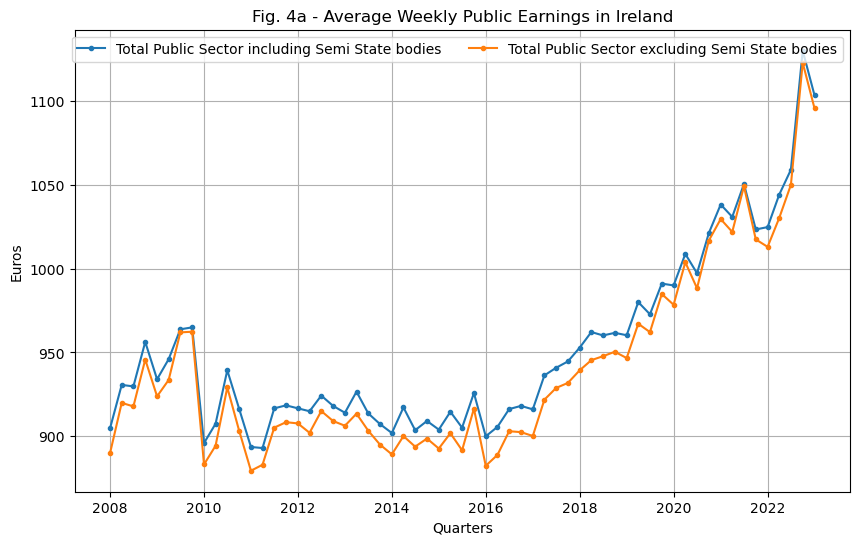

In [34]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining group with total figures
totalsEarnIE_group = ['Total Public Sector including Semi State bodies', 'Total Public Sector excluding Semi State bodies']

# looping through the group created 
for subsector in totalsEarnIE_group:
    df_subsector = earningsIe[earningsIe['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Euros')
plt.title('Fig. 4a - Average Weekly Public Earnings in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='best', ncol=2) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

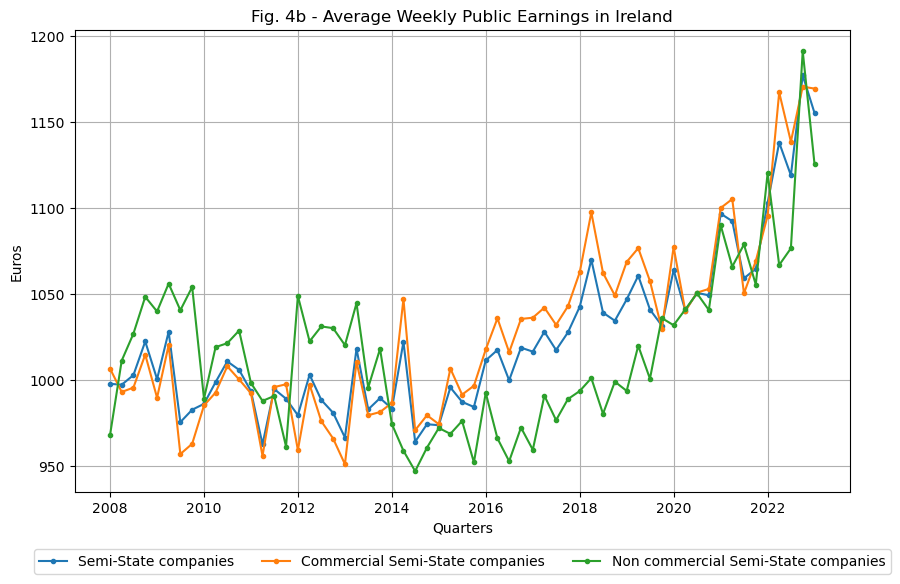

In [35]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining semi-state companies group
semiState_group = ['Semi-State companies', 'Commercial Semi-State companies', 'Non commercial Semi-State companies']

# looping through semiState_group 
for subsector in semiState_group:
    df_subsector = earningsIe[earningsIe['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Euros')
plt.title('Fig. 4b - Average Weekly Public Earnings in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

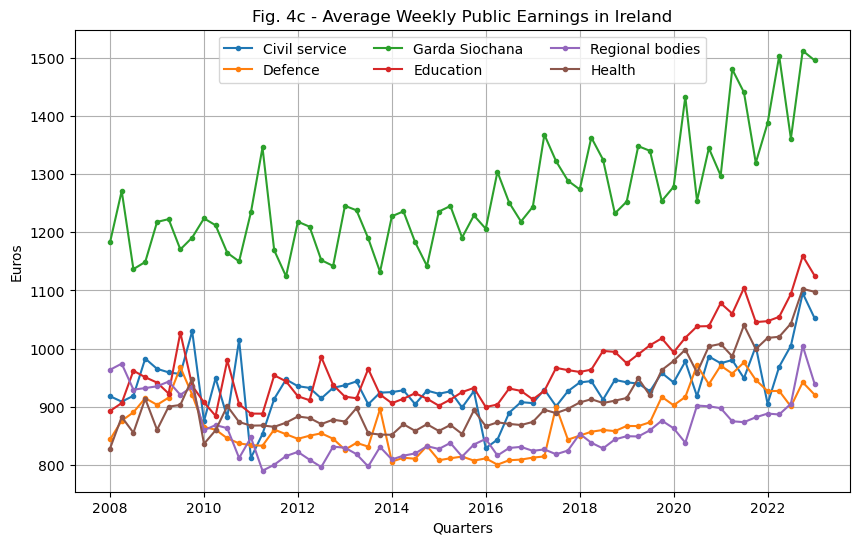

In [36]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining subsectors
subsectors = ['Civil service', 'Defence', 'Garda Siochana', 'Education', 'Regional bodies', 'Health']

#Looping through the Sub_Sectors in the group 
for subsector in subsectors:
    dfIe_subsector = earningsIe[earningsIe['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(dfIe_subsector.index, dfIe_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Euros')
plt.title('Fig. 4c - Average Weekly Public Earnings in Ireland')
plt.grid(True)

# Put the legend in the background
ax.legend(loc='upper center', ncol=3)

plt.show()

### UK data

In [37]:
#selecting target features as a joined list from two ranges
ukColumns=list(range(0, 7)) + list(range(13, 21))

In [38]:
# reading in file, only selected features
dfUK = pd.read_csv('pse.csv',skiprows=7,usecols=ukColumns) # taking selected columns only

In [39]:
dfUK

,1991,2333,3070,5403,582,5985,593,182,311,224,1292,1325,1220,432,999
0,1992,2348,3018,5366,544,5910,609,166,304,226,1300,1302,1225,428,958
1,1993,2529,2787,5316,515,5830,601,153,285,228,1263,1371,1204,414,913
2,1994,2470,2752,5222,446,5668,578,146,262,228,1229,1347,1189,423,843
3,1995,2417,2757,5174,433,5607,555,140,241,227,1198,1369,1193,426,812
4,1996,2379,2732,5111,395,5506,538,129,230,230,1186,1365,1197,420,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022 Q1,3550,2003,5553,194,5747,512,35,158,272,1145,1501,1880,213,544
155,2022 Q2,3550,1995,5545,194,5740,512,34,156,272,1144,1499,1878,213,542
156,2022 Q3,3576,1985,5561,197,5758,513,34,155,274,1143,1494,1900,211,547
157,2022 Q4,3602,1999,5601,198,5799,515,34,153,276,1152,1506,1915,212,551


In [40]:
# assingning names to columns
dfUK.columns=['Year/Quarter','Central_Gov','Local_Gov','Total_General_Gov','Total_Public_Corps','Total_Public_Sector','Civil_Service','Construction', 'HM_Forces', 'Police', 'Public_Admin', 'Education', 'NHS', 'Other_Health_&_Social', 'Other_Public_Sector']

In [41]:
dfUK

,Year/Quarter,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Construction,HM_Forces,Police,Public_Admin,Education,NHS,Other_Health_&_Social,Other_Public_Sector
0,1992,2348,3018,5366,544,5910,609,166,304,226,1300,1302,1225,428,958
1,1993,2529,2787,5316,515,5830,601,153,285,228,1263,1371,1204,414,913
2,1994,2470,2752,5222,446,5668,578,146,262,228,1229,1347,1189,423,843
3,1995,2417,2757,5174,433,5607,555,140,241,227,1198,1369,1193,426,812
4,1996,2379,2732,5111,395,5506,538,129,230,230,1186,1365,1197,420,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022 Q1,3550,2003,5553,194,5747,512,35,158,272,1145,1501,1880,213,544
155,2022 Q2,3550,1995,5545,194,5740,512,34,156,272,1144,1499,1878,213,542
156,2022 Q3,3576,1985,5561,197,5758,513,34,155,274,1143,1494,1900,211,547
157,2022 Q4,3602,1999,5601,198,5799,515,34,153,276,1152,1506,1915,212,551


In [42]:
dfUK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year/Quarter           159 non-null    object
 1   Central_Gov            159 non-null    int64 
 2   Local_Gov              159 non-null    int64 
 3   Total_General_Gov      159 non-null    int64 
 4   Total_Public_Corps     159 non-null    int64 
 5   Total_Public_Sector    159 non-null    int64 
 6   Civil_Service          159 non-null    int64 
 7   Construction           159 non-null    int64 
 8   HM_Forces              159 non-null    int64 
 9   Police                 159 non-null    int64 
 10  Public_Admin           159 non-null    int64 
 11  Education              159 non-null    int64 
 12  NHS                    159 non-null    int64 
 13  Other_Health_&_Social  159 non-null    int64 
 14  Other_Public_Sector    159 non-null    int64 
dtypes: int64(14), object(1)

In [43]:
dfUK.describe()

,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Construction,HM_Forces,Police,Public_Admin,Education,NHS,Other_Health_&_Social,Other_Public_Sector
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2400.490566,2201.962264,4602.459119,335.484277,4937.949686,427.899371,56.578616,165.408805,219.547170,988.169811,1296.761006,1271.000000,287.345912,653.062893
std,1038.225835,967.110088,1910.311790,199.311151,2057.705890,182.723704,39.747046,75.201940,92.596081,416.266608,541.683925,555.279209,135.174102,311.183423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2377.500000,2012.000000,5141.000000,196.000000,5412.000000,432.000000,35.000000,156.000000,228.000000,1029.500000,1388.500000,1202.000000,213.000000,547.500000
50%,2734.000000,2680.000000,5231.000000,358.000000,5607.000000,505.000000,46.000000,189.000000,250.000000,1144.000000,1498.000000,1475.000000,352.000000,733.000000
75%,2873.000000,2845.500000,5567.500000,395.000000,5989.500000,528.000000,78.500000,214.000000,271.000000,1212.000000,1565.500000,1553.000000,377.000000,811.000000
max,3643.000000,3070.000000,5783.000000,732.000000,6480.000000,609.000000,182.000000,311.000000,296.000000,1300.000000,1689.000000,1944.000000,432.000000,1147.000000


In [44]:
dfUK.describe(include=object)

,Year/Quarter
count,159
unique,159
top,1992
freq,1


In [45]:
from datetime import datetime

In [46]:
type(pd.to_datetime('1992', format='%Y').year)

int

In [47]:
#possibleValues = dfUK['Year/Quarter'].unique()

In [50]:
# Function to convert Year/Quarter to datetime
def to_datetimeCustom(value):
    year, *quarter = value.split(' ') #quarter holds the string after the white space
    if quarter: 
        quarter_num = int(quarter[0][1]) # If quarter exists it extracts the second element of string
        month = (quarter_num - 1) * 3 + 1 # calculating the starting month of the quarter 
        return pd.to_datetime(f'{year}-{month:02d}-01')
    else:
        return int(year)

In [51]:
# Convert the 'Year/Quarter' column to datetime
dfUK['Year/Quarter'] = dfUK['Year/Quarter'].apply(to_datetimeCustom)

In [52]:
dfUK['Year/Quarter']

0                     1992
1                     1993
2                     1994
3                     1995
4                     1996
              ...         
154    2022-01-01 00:00:00
155    2022-04-01 00:00:00
156    2022-07-01 00:00:00
157    2022-10-01 00:00:00
158    2023-01-01 00:00:00
Name: Year/Quarter, Length: 159, dtype: object

In [53]:
dfUK

,Year/Quarter,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Construction,HM_Forces,Police,Public_Admin,Education,NHS,Other_Health_&_Social,Other_Public_Sector
0,1992,2348,3018,5366,544,5910,609,166,304,226,1300,1302,1225,428,958
1,1993,2529,2787,5316,515,5830,601,153,285,228,1263,1371,1204,414,913
2,1994,2470,2752,5222,446,5668,578,146,262,228,1229,1347,1189,423,843
3,1995,2417,2757,5174,433,5607,555,140,241,227,1198,1369,1193,426,812
4,1996,2379,2732,5111,395,5506,538,129,230,230,1186,1365,1197,420,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022-01-01 00:00:00,3550,2003,5553,194,5747,512,35,158,272,1145,1501,1880,213,544
155,2022-04-01 00:00:00,3550,1995,5545,194,5740,512,34,156,272,1144,1499,1878,213,542
156,2022-07-01 00:00:00,3576,1985,5561,197,5758,513,34,155,274,1143,1494,1900,211,547
157,2022-10-01 00:00:00,3602,1999,5601,198,5799,515,34,153,276,1152,1506,1915,212,551


In [33]:
pd.read_csv('emp.csv',skiprows=7,header=None) 

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,2000,89.2,NaN,NaN,405.0,88.3,NaN,NaN,426.0,NaN,...,311.0,NaN,311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,92.0,NaN,NaN,417.0,91.5,NaN,NaN,442.0,NaN,...,328.0,NaN,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,94.1,NaN,NaN,427.0,93.0,NaN,NaN,449.0,NaN,...,340.0,NaN,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,96.0,NaN,NaN,436.0,94.7,NaN,NaN,457.0,NaN,...,357.0,NaN,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,98.1,NaN,NaN,445.0,97.4,NaN,NaN,470.0,NaN,...,372.0,NaN,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2023 JAN,103.9,-2.4,-2.3,471.0,104.5,-2.9,-3.0,505.0,5.8,...,620.0,5.8,616.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN
837,2023 FEB,104.0,-2.0,-2.2,472.0,104.8,-2.3,-3.1,506.0,6.7,...,620.0,5.4,616.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN
838,2023 MAR,104.0,-1.6,-2.0,472.0,105.2,-3.2,-2.8,508.0,5.8,...,620.0,5.5,617.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN
839,2023 APR,104.4,-0.1,-1.2,474.0,105.0,0.0,-1.8,507.0,7.8,...,624.0,6.1,620.0,6.1,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
headers = pd.read_csv('emp.csv',nrows=0) 
print(headers)

Empty DataFrame
Columns: [Title, AWE: Whole Economy Real Terms Index: Seasonally Adjusted Regular Pay, AWE: Whole Economy Real Terms Year on Year Single Month Growth (%): Seasonally Adjusted Regular Pay, AWE: Whole Economy Real Terms Year on Year three Month Growth (%): Seasonally Adjusted Regular Pay, AWE: Whole Economy Real Terms Level (£): Seasonally Adjusted Regular Pay, AWE: Whole Economy Real Terms Index: Seasonally Adjusted Total Pay, AWE: Whole Economy Real Terms Year on Year Single Month Growth (%): Seasonally Adjusted Total Pay, AWE: Whole Economy Real Terms Year on Year Three Month Growth (%): Seasonally Adjusted Total Pay, AWE: Whole Economy Real Terms Level (£): Seasonally Adjusted Total Pay, AWE: Whole Economy Year on Year Single Month Growth (%): Non Seasonally Adjusted Total Pay Excluding Arrears, AWE: Manufacturing Year on Year Single Month Growth (%): Non Seasonally Adjusted Total Pay Excluding Arrears, AWE: Construction Year on Year Single Month Growth (%): Non Seaso

In [35]:
# pd.set_option('display.max_columns', None)

# # Display the first row horizontally without truncation
# print(headers)

# # Reset the display option to its default value
# pd.reset_option('display.max_columns')

## SPAIN

In [36]:
#!pip install chardet

In [37]:
# Checking the encoding type of the file with chardet due to UnicodeDecodeError 'utf-8' 
import chardet
with open('4262bscSPAIN.csv', 'rb') as file: # reading the file in binary mode
    raw_data = file.read()

chardet.detect(raw_data) #detecting encoding

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [38]:
dfSP = pd.read_csv('4262bscSPAIN.csv',encoding="ISO-8859-1",delimiter=';', quotechar='"') #need to specify delimiter and quotechar, to indicate that the fields containing the delimiter character are quoted with double quotes, like one single string
dfSP

,Sexo,Comunidades y Ciudades Autónomas,Tipo de sector,Periodo,Total
0,Ambos sexos,Total Nacional,Empleo público,2023T1,"3.523,9"
1,Ambos sexos,Total Nacional,Empleo público,2022T4,"3.526,2"
2,Ambos sexos,Total Nacional,Empleo público,2022T3,"3.506,2"
3,Ambos sexos,Total Nacional,Empleo público,2022T2,"3.453,9"
4,Ambos sexos,Total Nacional,Empleo público,2022T1,"3.468,2"
...,...,...,...,...,...
5095,Mujeres,19 Melilla,Empleo público,2003T1,"4,3"
5096,Mujeres,19 Melilla,Empleo público,2002T4,"4,1"
5097,Mujeres,19 Melilla,Empleo público,2002T3,"4,5"
5098,Mujeres,19 Melilla,Empleo público,2002T2,"4,0"


In [39]:
dfSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo                              5100 non-null   object
 1   Comunidades y Ciudades Autónomas  5100 non-null   object
 2   Tipo de sector                    5100 non-null   object
 3   Periodo                           5100 non-null   object
 4   Total                             5100 non-null   object
dtypes: object(5)
memory usage: 199.3+ KB


In [40]:
dfSP.describe()

,Sexo,Comunidades y Ciudades Autónomas,Tipo de sector,Periodo,Total
count,5100,5100,5100,5100,5100
unique,3,20,1,85,2386
top,Ambos sexos,Total Nacional,Empleo público,2023T1,"4,1"
freq,1700,255,5100,60,16


In [41]:
dfSP['Periodo'].unique()

array(['2023T1', '2022T4', '2022T3', '2022T2', '2022T1', '2021T4',
       '2021T3', '2021T2', '2021T1', '2020T4', '2020T3', '2020T2',
       '2020T1', '2019T4', '2019T3', '2019T2', '2019T1', '2018T4',
       '2018T3', '2018T2', '2018T1', '2017T4', '2017T3', '2017T2',
       '2017T1', '2016T4', '2016T3', '2016T2', '2016T1', '2015T4',
       '2015T3', '2015T2', '2015T1', '2014T4', '2014T3', '2014T2',
       '2014T1', '2013T4', '2013T3', '2013T2', '2013T1', '2012T4',
       '2012T3', '2012T2', '2012T1', '2011T4', '2011T3', '2011T2',
       '2011T1', '2010T4', '2010T3', '2010T2', '2010T1', '2009T4',
       '2009T3', '2009T2', '2009T1', '2008T4', '2008T3', '2008T2',
       '2008T1', '2007T4', '2007T3', '2007T2', '2007T1', '2006T4',
       '2006T3', '2006T2', '2006T1', '2005T4', '2005T3', '2005T2',
       '2005T1', '2004T4', '2004T3', '2004T2', '2004T1', '2003T4',
       '2003T3', '2003T2', '2003T1', '2002T4', '2002T3', '2002T2',
       '2002T1'], dtype=object)

In [42]:
dfSP['Tipo de sector'].unique()

array(['Empleo público'], dtype=object)

In [43]:
dfSP['Comunidades y Ciudades Autónomas'].unique()

array(['Total Nacional', '01 Andalucía', '02 Aragón',
       '03 Asturias, Principado de', '04 Balears, Illes', '05 Canarias',
       '06 Cantabria', '07 Castilla y León', '08 Castilla - La Mancha',
       '09 Cataluña', '10 Comunitat Valenciana', '11 Extremadura',
       '12 Galicia', '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

### Tweets scraping

In [9]:
import requests

In [51]:
bearer_token = 'XXXXXXX'
query = '"public sector pay" place_country:IE'
max_results = 1

In [52]:
headers = {
    'Authorization': f'Bearer {bearer_token}'
}

params = {
    'query': query,
    'max_results': max_results
}

url = 'https://api.twitter.com/2/tweets/search/recent'

In [53]:
response = requests.get(url, headers=headers, params=params)
response.json()

{'client_id': '26497181',
 'detail': 'When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.',
 'registration_url': 'https://developer.twitter.com/en/docs/projects/overview',
 'title': 'Client Forbidden',
 'required_enrollment': 'Appropriate Level of API Access',
 'reason': 'client-not-enrolled',
 'type': 'https://api.twitter.com/2/problems/client-forbidden'}

In [54]:
#!pip install python-dotenv

In [55]:
from dotenv import dotenv_values

# cargamos tokens del .env file
config = dotenv_values(".env")

In [56]:
import requests
import json


# setting environment variables
bearer_token = config["BEARER_TOKEN"]

search_url = "https://api.twitter.com/2/tweets/search/recent"

# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
query_params = {
#     'query': 'from:elonmusk -is:retweet is:verified',
    'query' : '"public sector pay" OR "public sector earnings" place_country:IE -is:retweet', # -is:retweet -> avoids retweets
    "max_results":"3", # number of results we'll get
    'tweet.fields': 'author_id', # con el id del autor podemos buscar por autor
    'user.fields': 'name',
}

In [91]:
def bearer_oauth(r):
    
    #Method required by bearer token authentication.
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

In [105]:
# set the query
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params) # how we set the request itself with .get
    
    return response.json()

# Querying the API
json_response = connect_to_endpoint(search_url, query_params)

In [106]:
# Parsing the response
parsedRes = json.dumps(json_response, indent=4, sort_keys=True, ensure_ascii=False) # indent 4 to look nice indent. ascii to get emoties etc.
print(parsedRes)

{
    "client_id": "26497181",
    "detail": "When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.",
    "reason": "client-not-enrolled",
    "registration_url": "https://developer.twitter.com/en/docs/projects/overview",
    "required_enrollment": "Appropriate Level of API Access",
    "title": "Client Forbidden",
    "type": "https://api.twitter.com/2/problems/client-forbidden"
}


In [110]:
#!pip install tweepy

In [111]:
import tweepy

In [112]:
consumer_key = "XXXXXXX" #Your API/Consumer key 
consumer_secret = "XXXXXXX" #Your API/Consumer Secret Key
access_token = "XXXXXXX-XXXXXXX"    #Your Access token key
access_token_secret = "XXXXXXX" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

In [145]:
search_query = '"public sector pay" OR "public sector earnings" place_country:IE -is:retweet'
no_of_tweets = 100

try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode ='extended')
    
    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
    
    #Creation of df
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))

Status Failed On, 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product
